In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras as kr
import keras.backend as K

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers.convolutional import Conv2D, MaxPooling2D


batch_size = 128
num_classes = 10
epochs = 5

img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Dropout(.25))
model.add(Flatten())
model.add(Dense(625, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(num_classes, activation="softmax", name="preds"))

model.compile(loss=kr.losses.categorical_crossentropy,
              optimizer=kr.optimizers.Adam(),
              metrics=["accuracy"])

In [4]:
y_train = kr.utils.to_categorical(y_train, num_classes)
y_test = kr.utils.to_categorical(y_test, num_classes)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 128)        

In [5]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2104 - accuracy: 0.9323 - val_loss: 0.0462 - val_accuracy: 0.9846
Epoch 2/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0595 - accuracy: 0.9813 - val_loss: 0.0289 - val_accuracy: 0.9905
Epoch 3/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.0377 - val_accuracy: 0.9870
Epoch 4/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0253 - val_accuracy: 0.9909
Epoch 5/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0288 - accuracy: 0.9907 - val_loss: 0.0225 - val_accuracy: 0.9913


Text(0.5, 1.0, 'Index: 10308, Value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]')

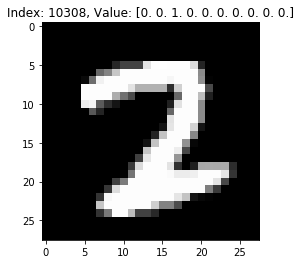

In [6]:
from random import randrange


test_idx = randrange(x_train.shape[0])
test_img = x_train[test_idx]
plt.imshow(test_img.reshape(28, 28), cmap="gray")
plt.title("Index: {}, Value: {}".format(test_idx, y_train[test_idx]))

In [7]:
from keras import Model


layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_img.reshape(1, 28, 28, 1))


def display_activation(activations, row_size, col_size, act_index):
    activation = activations[act_index]
    activation_index = 0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size * 2.5, col_size * 1.5))
    plt.title("Layer number: {}".format(act_index))
    for row in range(row_size):
        for col in range(col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap="gray")
            activation_index += 1

In [8]:
def display_filter(action_index, row_size, col_size, filter_index):
    weight = model.layers[action_index].get_weights()[0][:, :, 0, :]
    flg, ax = plt.subplots(row_size, col_size, figsize=(row_size * 2.5, col_size * 1.5))
    for row in range(row_size):
        for col in range(col_size):
            ax[row][col].imshow(weight[:, :, filter_index], cmap="gray")
            filter_index += 1

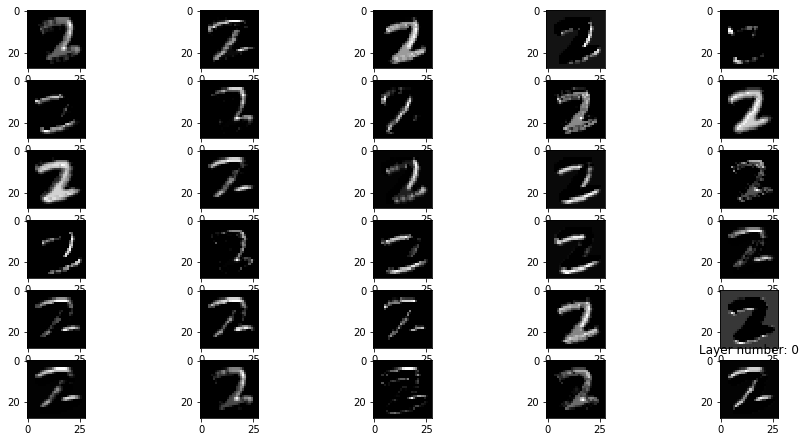

In [9]:
display_activation(activations, 6, 5, 0)

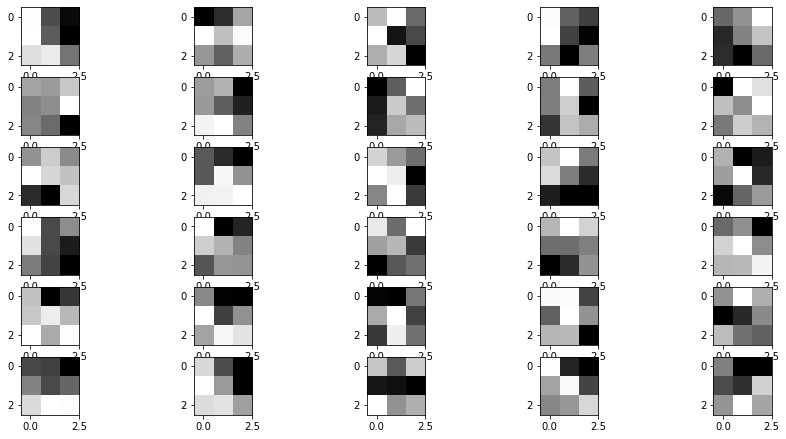

In [10]:
display_filter(0, 6, 5, 0)

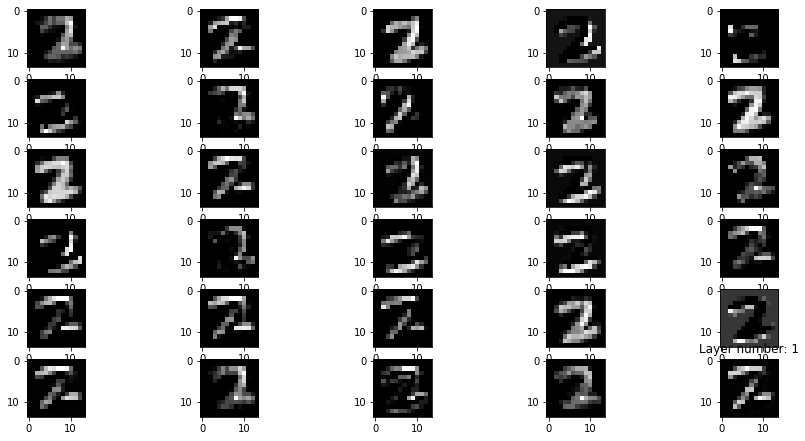

In [11]:
display_activation(activations, 6, 5, 1)

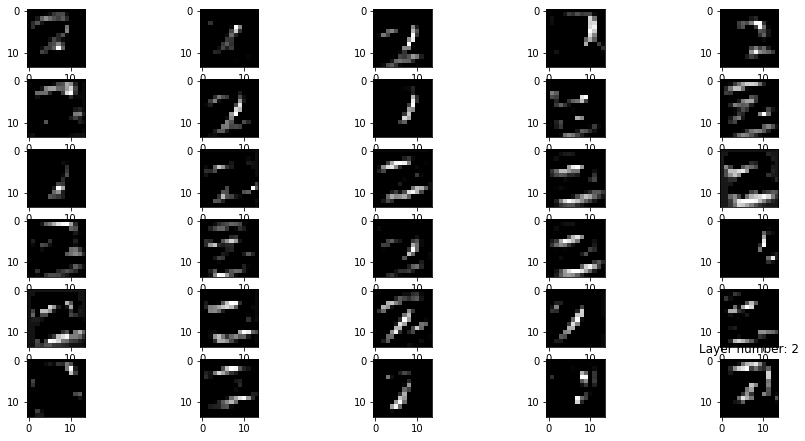

In [12]:
display_activation(activations, 6, 5, 2)

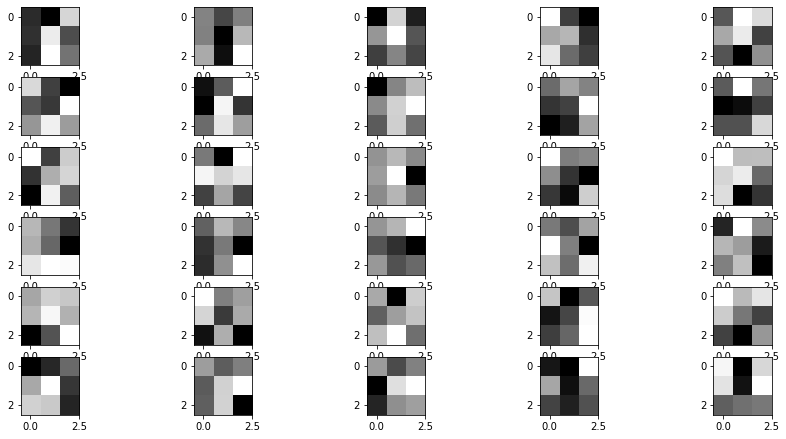

In [13]:
display_filter(2, 6, 5, 0)

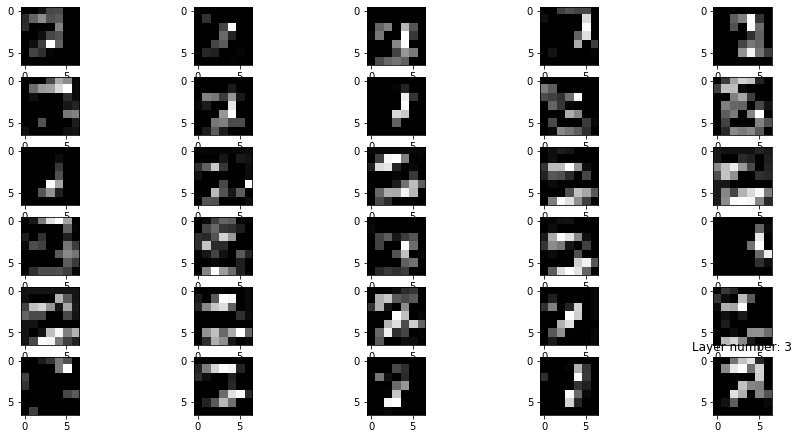

In [14]:
display_activation(activations, 6, 5, 3)

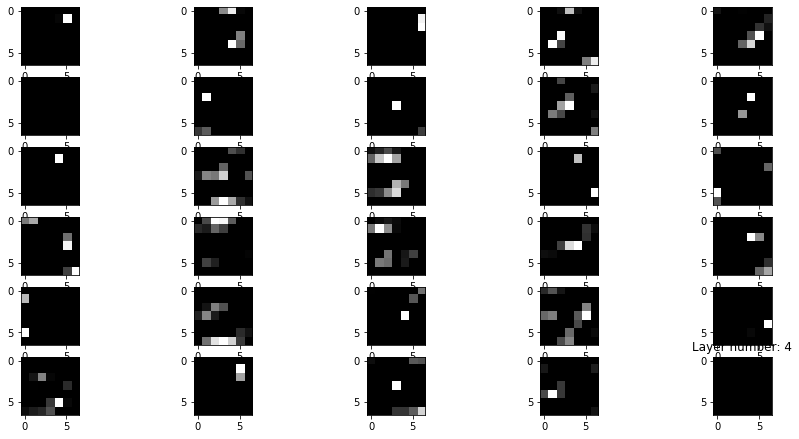

In [15]:
display_activation(activations, 6, 5, 4)

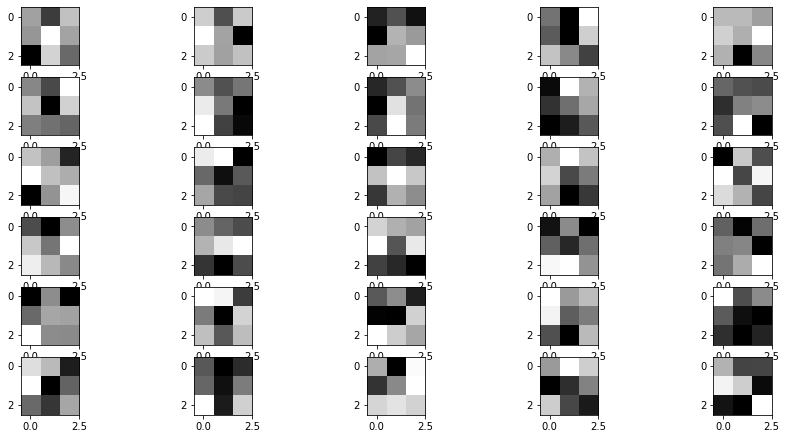

In [16]:
display_filter(4, 6, 5, 0)

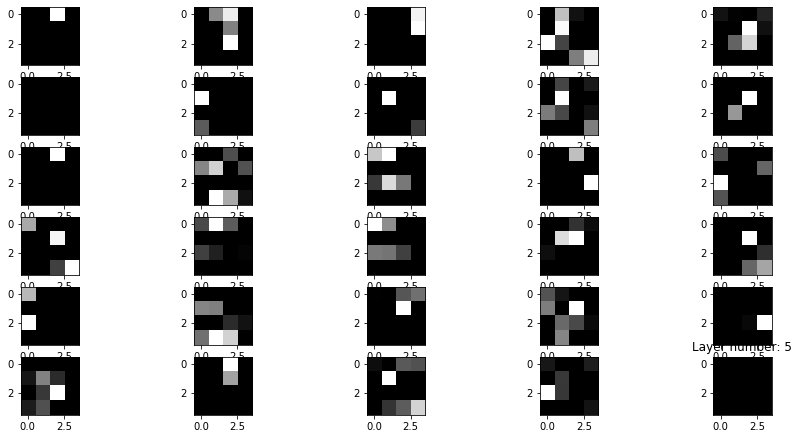

In [17]:
display_activation(activations, 6, 5, 5)

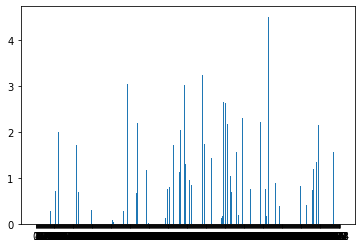

In [18]:
act_dense_1 = activations[8]
y = act_dense_1[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

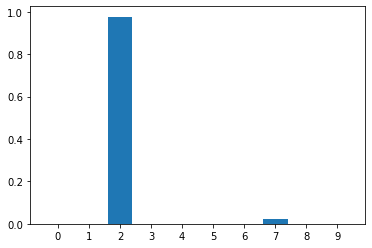

In [19]:
act_dense_2 = activations[10]
y = act_dense_2[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()